# 홈플러스 데이터 
링크 : https://mfront.homeplus.co.kr/search?addSubCategoryYn=Y&categoryDepth=2&categoryId=200071&entry=direct&inputKeyword=%EA%B0%84%ED%8E%B8%EC%8B%9D&keyword=%EA%B0%84%ED%8E%B8%EC%8B%9D&searchType=NONE&sort=SALES_UP

## 데이터 수집

In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import pandas as pd
import time

In [2]:
driver = webdriver.Chrome()

# URL 접속
url = "https://mfront.homeplus.co.kr/search?addSubCategoryYn=Y&categoryDepth=2&categoryId=200071&entry=direct&inputKeyword=%EA%B0%84%ED%8E%B8%EC%8B%9D&keyword=%EA%B0%84%ED%8E%B8%EC%8B%9D&searchType=NONE&sort=SALES_UP"
driver.get(url)

### 스크래핑할 부분 샘플 체크

In [3]:
 product_name = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > a > p").text
print( product_name)   

애슐리 오리지널 통살치킨 500G


In [ ]:
#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(2) > div.detailInfoWrap > div.detailInfo > a > p

In [5]:
price_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > div.priceWrap > div > strong").text
price = int(price_text.replace(",", ""))  # 쉼표 제거 후 정수로 변환
print(f"가격: {price}")

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > div.priceWrap > div > strong"}
  (Session info: chrome=131.0.6778.205); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	(No symbol) [0x00007FF9D99B1ECC]
	GetHandleVerifier [0x00007FF6474EFB05+28789]
	(No symbol) [0x00007FF6474586E0]
	(No symbol) [0x00007FF6472F592A]
	(No symbol) [0x00007FF64734930E]
	(No symbol) [0x00007FF6473495FC]
	(No symbol) [0x00007FF6473928A7]
	(No symbol) [0x00007FF64736F47F]
	(No symbol) [0x00007FF64738F654]
	(No symbol) [0x00007FF64736F1E3]
	(No symbol) [0x00007FF64733A938]
	(No symbol) [0x00007FF64733BAA1]
	GetHandleVerifier [0x00007FF64782933D+3410093]
	GetHandleVerifier [0x00007FF64783E7DD+3497293]
	GetHandleVerifier [0x00007FF647832A73+3448803]
	GetHandleVerifier [0x00007FF6475B7BBB+848171]
	(No symbol) [0x00007FF647463C3F]
	(No symbol) [0x00007FF64745F6E4]
	(No symbol) [0x00007FF64745F87D]
	(No symbol) [0x00007FF64744ED49]
	ExitProcess [0x00007FF9D7D1F95C+953884]
	ExitProcess [0x00007FF9D7CA0578+432696]
	(No symbol) [0x00007FF9D98EBEF0]


In [5]:
rating_text = driver.find_element(By.CSS_SELECTOR, "#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(2) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.score").text
rating = float(rating_text)  # 문자열을 실수로 변환
print(f"별점: {rating}")

별점: 4.8


In [6]:
review_text = driver.find_element(By.CSS_SELECTOR, "#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.reviewCnt").text
review_count = int(review_text.replace("/", "").replace(",", ""))  # '/'와 ',' 제거 후 정수로 변환
print(f"리뷰 수: {review_count}")

리뷰 수: 6744


In [7]:
sale_count_text = driver.find_element(By.CSS_SELECTOR, "#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.saleCount").text
sale_count = int(sale_count_text.replace(",", ""))  # 쉼표 제거 후 정수로 변환
print(f"판매 수량: {sale_count}")

판매 수량: 56858


### 반복문으로 끌고오기

In [8]:
# 상품 개수 확인 (첫 번째 상품 컨테이너의 개수)
items = driver.find_elements(By.CSS_SELECTOR, "div.infinite-scroll-component > div > div:nth-child(1) > div")
total_items = len(items)

In [9]:
print(total_items)

4


In [37]:
product_list = []

# 첫 번째 그룹 (div:nth-child(1))
for i in range(1, 5):
    try:
        product_name = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div > div.search-prod-list-wrap > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > a > p").text
        
        price_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.priceWrap > div > strong").text
        price = int(price_text.replace(",", ""))
        
        try:
            rating_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.score").text
            rating = float(rating_text)
        except:
            rating = None
            
        try:
            review_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.reviewCnt").text
            review_count = int(review_text.replace("/", "").replace(",", ""))
        except:
            review_count = 0
            
        try:
            sale_count_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.saleCount").text
            sale_count = int(sale_count_text.replace(",", ""))
        except:
            sale_count = 0
        
        product_data = {
            '상품명': product_name,
            '가격': price,
            '별점': rating,
            '리뷰수': review_count,
            '판매수량': sale_count
        }
        product_list.append(product_data)
        print(f"첫 번째 그룹 {i}번째 상품 수집 완료")
        
    except Exception as e:
        print(f"첫 번째 그룹 {i}번째 상품 수집 실패: {e}")
        continue

# 두 번째 그룹 (div:nth-child(2))
for i in range(1, 1122):  # 1121까지
    try:
        product_name = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > a > p").text
        
        price_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.priceWrap > div > strong").text
        price = int(price_text.replace(",", ""))
        
        try:
            rating_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.score").text
            rating = float(rating_text)
        except:
            rating = None
            
        try:
            review_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.reviewCnt").text
            review_count = int(review_text.replace("/", "").replace(",", ""))
        except:
            review_count = 0
            
        try:
            sale_count_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(2) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.saleCount").text
            sale_count = int(sale_count_text.replace(",", ""))
        except:
            sale_count = 0
        
        product_data = {
            '상품명': product_name,
            '가격': price,
            '별점': rating,
            '리뷰수': review_count,
            '판매수량': sale_count
        }
        product_list.append(product_data)
        if i % 50 == 0:  # 500개 단위로 진행상황 출력
            print(f"두 번째 그룹 {i}번째 상품 수집 완료")
        
    except Exception as e:
        print(f"두 번째 그룹 {i}번째 상품 수집 실패: {e}")
        continue

# DataFrame 생성
df = pd.DataFrame(product_list)

첫 번째 그룹 1번째 상품 수집 실패: Message: no such element: Unable to locate element: {"method":"css selector","selector":"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child(1) > div.detailInfoWrap > div.detailInfo > div.priceWrap > div > strong"}
  (Session info: chrome=131.0.6778.205); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
	(No symbol) [0x00007FF9D99B1ECC]
	GetHandleVerifier [0x00007FF6474EFB05+28789]
	(No symbol) [0x00007FF6474586E0]
	(No symbol) [0x00007FF6472F592A]
	(No symbol) [0x00007FF64734930E]
	(No symbol) [0x00007FF6473495FC]
	(No symbol) [0x00007FF6473928A7]
	(No symbol) [0x00007FF64736F47F]
	(No symbol) [0x00007FF64738F654]
	(No symbol) [0x00007FF64736F1E3]
	(No symbol) [0x00007FF64733A938]
	(No symbol) [0x00007FF64733BAA1]
	GetHandleVerifier [0x00007FF64782933D+

#### 처음 시도한 코드 : selector 구조가 달라 오류가 생김

In [11]:
# # 스크롤 함수 정의
# def scroll_down():
#     last_height = driver.execute_script("return document.body.scrollHeight")
#     while True:
#         # 페이지 끝까지 스크롤
#         driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
#         # 페이지 로딩 대기
#         time.sleep(2)
#         # 새로운 높이 계산
#         new_height = driver.execute_script("return document.body.scrollHeight")
#         if new_height == last_height:
#             break
#         last_height = new_height

# # 데이터를 저장할 리스트 생성
# product_list = []


# # 데이터 수집
# for i in range(1, 5):
#     try:
#         # 각 요소 수집
#         product_name = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > a > p").text
        
#         price_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.priceWrap > div > strong").text
#         price = int(price_text.replace(",", ""))
        
#         try:
#             rating_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.score").text
#             rating = float(rating_text)
#         except:
#             rating = None
            
#         try:
#             review_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.reviewCnt").text
#             review_count = int(review_text.replace("/", "").replace(",", ""))
#         except:
#             review_count = 0
            
#         try:
#             sale_count_text = driver.find_element(By.CSS_SELECTOR, f"#site-wrapper > div.content-container.bannerUnderLine.css-130pxjn.e6c4o0v6 > div.infinite-scroll-component__outerdiv > div > div:nth-child(1) > div:nth-child({i}) > div.detailInfoWrap > div.detailInfo > div.prodScoreWrap > span.saleCount").text
#             sale_count = int(sale_count_text.replace(",", ""))
#         except:
#             sale_count = 0
        
#         # 수집된 데이터를 딕셔너리로 저장
#         product_data = {
#             '상품명': product_name,
#             '가격': price,
#             '별점': rating,
#             '리뷰수': review_count,
#             '판매수량': sale_count
#         }
        
#         product_list.append(product_data)
#         print(f"{i}번째 상품 수집 완료")
        
#     except Exception as e:
#         print(f"{i}번째 상품 수집 실패: {e}")
#         continue

# # DataFrame 생성
# df = pd.DataFrame(product_list)



### 데이터 확인

In [8]:
# 파일 경로 지정 (사용자의 다운로드 폴더 경로에 맞게 수정하세요)
file_path = r"C:\Users\eunju\Downloads\homplus_mealkit_data.csv"

# CSV 파일 읽어오기
df = pd.read_csv(file_path, encoding = 'cp949')

In [9]:
df.tail()

,상품명,가격,별점,리뷰수,판매수량,온라인판매금액
1120,하코야 롱 오징어까스 320G,10900,4.6,2322,1517,16535300
1121,[밀키트] 홈밀 우삼겹 된장찌개 480G (1인분),6990,4.6,697,1024,7157760
1122,[밀키트] 홈밀 전주식 콩나물국밥 410.7G,8990,4.7,87,267,2400330
1123,[밀키트] 홈밀 김치비지찌개 요리재료 350G,6990,4.7,59,247,1726530
1124,[밀키트] 가쓰오 모듬어묵전골 1433G,23990,5.0,5,28,671720


## 데이터 정제

### 질문 : 아래 상품명 데이터를 가지고 상품 카테고리를 어떻게 나눠야 할지 모르겠음 
* 지혜님 의견 : 굳이 카테고리를 나누는 것보다는 패스트 팔로워 관점에서 잘나가는 상품 3~4개만 집중해보자

#### (x) 상품 카테고리 시도 중 

In [13]:
#product_names_list = df["상품명"].tolist()
#print(product_names_list) #ai서비스에서 자동으로 카테고리화 시키려다가 중단

In [10]:
df["온라인판매금액"] = df["가격"] * df["판매수량"]

In [11]:
df.head()

,상품명,가격,별점,리뷰수,판매수량,온라인판매금액
0,애슐리 오리지널 통살치킨 500G,8990,4.7,6740,56858,511153420
1,하코야 통 치즈 돈까스 350G,10900,4.8,7061,17618,192036200
2,투다리 김치오뎅전골 653G,15900,4.7,1069,13141,208941900
3,하코야 통 고구마 치즈 돈까스 280G,10900,4.8,1537,13003,141732700
4,[밀키트] 홈밀 쟌슨빌 부대찌개 985G,9990,4.8,11261,9301,92916990


In [12]:
#df.to_csv('homplus_mealkit_data.csv', encoding = 'cp949', index=False)

PermissionError: [Errno 13] Permission denied: 'homplus_mealkit_data.csv'

## EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   상품명      1125 non-null   object 
 1   가격       1125 non-null   int64  
 2   별점       192 non-null    float64
 3   리뷰수      1125 non-null   int64  
 4   판매수량     1125 non-null   int64  
 5   온라인판매금액  1125 non-null   int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 52.9+ KB


### 인기있는 상품 목록 확인

#### 별점이 가장 높은 5개 상품은? 

In [14]:
top_5_ratings = df.sort_values(by="별점", ascending=False).head(5)
top_5_ratings

,상품명,가격,별점,리뷰수,판매수량,온라인판매금액
1124,[밀키트] 가쓰오 모듬어묵전골 1433G,23990,5.0,5,28,671720
152,하남돼지집 돼지 김치찌개 500g x 3개,22800,5.0,2,23,524400
210,[한양족발] 국내산 순살족발(앞발) x 2개,27800,5.0,1,0,0
206,포차생각 닭볶음탕 1kg(국내산),15900,5.0,1,0,0
198,[산해직송 ]남도식 찰순대 토종순대 모음전 (국내산 토종 고기순대 1kg),16000,5.0,2,0,0


#### 판매수량이 가장 높은 5개 상품은? 

In [15]:
df.sort_values(by="판매수량", ascending=False).head(5)

,상품명,가격,별점,리뷰수,판매수량,온라인판매금액
0,애슐리 오리지널 통살치킨 500G,8990,4.7,6740,56858,511153420
1,하코야 통 치즈 돈까스 350G,10900,4.8,7061,17618,192036200
2,투다리 김치오뎅전골 653G,15900,4.7,1069,13141,208941900
3,하코야 통 고구마 치즈 돈까스 280G,10900,4.8,1537,13003,141732700
4,[밀키트] 홈밀 쟌슨빌 부대찌개 985G,9990,4.8,11261,9301,92916990


#### 판매금액이 가장 높은 5개 상품은? 

In [16]:
df.sort_values(by="온라인판매금액", ascending=False).head(5)

,상품명,가격,별점,리뷰수,판매수량,온라인판매금액
0,애슐리 오리지널 통살치킨 500G,8990,4.7,6740,56858,511153420
2,투다리 김치오뎅전골 653G,15900,4.7,1069,13141,208941900
1,하코야 통 치즈 돈까스 350G,10900,4.8,7061,17618,192036200
3,하코야 통 고구마 치즈 돈까스 280G,10900,4.8,1537,13003,141732700
6,하코야 김치카츠 나베 680G,16900,4.8,1382,5949,100538100


#### 리뷰가 가장 많은 5개 상품은?

In [17]:
df.sort_values(by="리뷰수", ascending=False).head(5)

,상품명,가격,별점,리뷰수,판매수량,온라인판매금액
4,[밀키트] 홈밀 쟌슨빌 부대찌개 985G,9990,4.8,11261,9301,92916990
11,[밀키트] 홈밀 푸짐한 스팸 부대찌개 1120G,9990,4.7,8347,2910,29070900
1,하코야 통 치즈 돈까스 350G,10900,4.8,7061,17618,192036200
0,애슐리 오리지널 통살치킨 500G,8990,4.7,6740,56858,511153420
5,[밀키트] 홈밀 의정부식 부대찌개 750G,6990,4.8,3752,7254,50705460


#### 인기있는 상품들의 평균 가격대는 어떠한가? 

In [18]:
# 리뷰수와 판매수량이 많은 상품 데이터를 각각 상위 5개씩 가져오기
top_reviews = df.sort_values(by="리뷰수", ascending=False).head(5)
top_sales = df.sort_values(by="판매수량", ascending=False).head(5)

# union all: 두 데이터프레임을 합치기 (중복 포함)
combined_top_products = pd.concat([top_reviews, top_sales], ignore_index=True)

In [19]:
combined_top_products.head()

,상품명,가격,별점,리뷰수,판매수량,온라인판매금액
0,[밀키트] 홈밀 쟌슨빌 부대찌개 985G,9990,4.8,11261,9301,92916990
1,[밀키트] 홈밀 푸짐한 스팸 부대찌개 1120G,9990,4.7,8347,2910,29070900
2,하코야 통 치즈 돈까스 350G,10900,4.8,7061,17618,192036200
3,애슐리 오리지널 통살치킨 500G,8990,4.7,6740,56858,511153420
4,[밀키트] 홈밀 의정부식 부대찌개 750G,6990,4.8,3752,7254,50705460


In [20]:
# 전체 상품의 평균 가격대 계산
average_price = df["가격"].mean()
print(f"전체 상품의 평균 가격대: {average_price:.2f}")

전체 상품의 평균 가격대: 29809.52


In [21]:
# 인기 상품의 평균 가격대 계산
top_online_sales_mean = combined_top_products["가격"].mean()
print(f"인기 상품의 평균 가격대: {top_online_sales_mean:.2f}")

인기 상품의 평균 가격대: 10354.00


-> 전체 상품가격대에 비해서 1/3정도 싸다.

#### 그렇다면 가격이 싸면 인기가 있는걸까? 

In [22]:
df.sort_values(by="가격", ascending=False).head(5)

,상품명,가격,별점,리뷰수,판매수량,온라인판매금액
929,요리친구 맥심 오리지날 커피 500g 12ea 1box,508410,NaN,0,0,0
1097,임꺽정 매운양념 불닭발 350gX26,303450,NaN,0,0,0
1095,직화구이 무뼈양념닭발(350g)X25,298870,NaN,0,0,0
818,요리친구 유동 자연산골뱅이 230g(24ea)(1box),293950,NaN,0,0,0
916,요리친구 동원 참치덕용(라이트스탠다드) 1.88kg(6ea),292110,NaN,0,0,0


In [23]:
# 가격과 온라인판매금액 간의 상관계수 확인
correlation = df["가격"].corr(df["온라인판매금액"])
print(f"가격과 온라인판매금액 간의 상관계수: {correlation}")

가격과 온라인판매금액 간의 상관계수: -0.052596794295712665


* 이상치 제거 : 일단 판매한 이력이 있고, 가격대가 10만원 이상은 제거

In [24]:
# 이상치 제거: 판매수량 > 0 이고 가격 < 100000
filtered_df = df[(df["판매수량"] > 0) & (df["가격"] < 100000)]

# 가격과 온라인판매금액 간의 상관계수 계산
correlation = filtered_df["가격"].corr(filtered_df["온라인판매금액"])
print(f"가격과 온라인판매금액 간의 상관계수: {correlation}")

가격과 온라인판매금액 간의 상관계수: -0.07477177327407399


 -> 이상치를 제거했음에도 거의 상관이 없는 것을 확인할 수 있다. 따라서 싸다고 무조건 잘팔리지는 않는다. 

* 시각화로 확인 : 

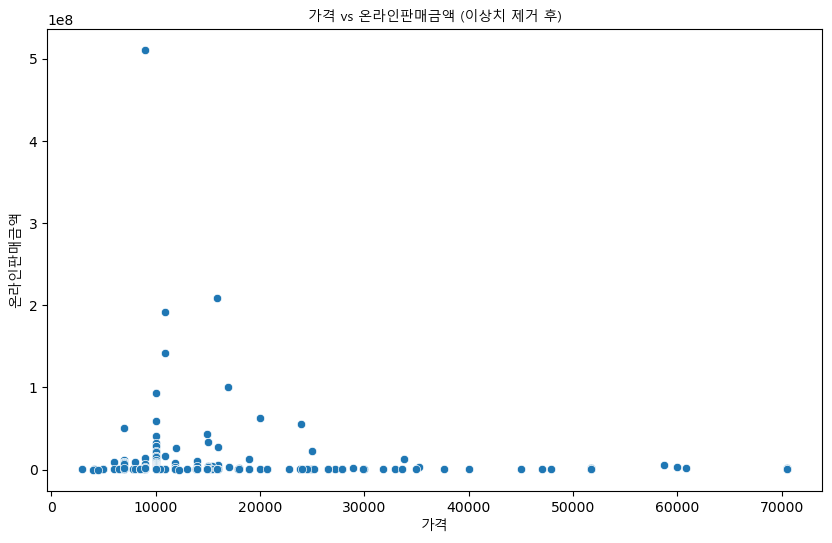

In [28]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
font_path = "C:/Windows/Fonts/malgun.ttf"
fontprop = fm.FontProperties(fname=font_path)

# 가격과 온라인판매금액 간의 산점도 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x='가격', y='온라인판매금액', data=filtered_df)
plt.title('가격 vs 온라인판매금액 (이상치 제거 후)', fontproperties=fontprop)
plt.xlabel('가격', fontproperties=fontprop)
plt.ylabel('온라인판매금액', fontproperties=fontprop)
plt.show()

#### 이상치 제거한 데이터에서, 인기상품 100위 까지 가장 자주 등장하는 상품명은 뭘까 ? 

In [29]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196 entries, 0 to 1124
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   상품명      196 non-null    object 
 1   가격       196 non-null    int64  
 2   별점       169 non-null    float64
 3   리뷰수      196 non-null    int64  
 4   판매수량     196 non-null    int64  
 5   온라인판매금액  196 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 10.7+ KB


In [30]:
df2= filtered_df.sort_values(by="판매수량", ascending=False).head(100)

In [35]:
product_names = df2["상품명"].tolist()
print(product_names)

['애슐리 오리지널 통살치킨 500G', '하코야 통 치즈 돈까스 350G', '투다리 김치오뎅전골 653G', '하코야 통 고구마 치즈 돈까스 280G', '[밀키트] 홈밀 쟌슨빌 부대찌개 985G', '[밀키트] 홈밀 의정부식 부대찌개 750G', '하코야 김치카츠 나베 680G', '[밀키트] 홈밀 채선당 소고기 샤브샤브 845G', '하코야 멘치까스 360G', '[밀키트] 얼큰 미나리 버섯샤브전골 835G', '[밀키트] 밀푀유 나베 4인분 1129G', '[밀키트] 홈밀 푸짐한 스팸 부대찌개 1120G', '하코야 오뎅전골 751G', '[밀키트] 홈밀 놀부 부대찌개 1042G', '라그릴리아 시그니처 바비큐폭립 600G', '[밀키트] 홈밀 감바스 알 아히요 420G', '[밀키트] 홈밀 이건 꼭 사야해 부대찌개 2.5KG', '[밀키트] 홈밀 푸짐한 밀푀유나베 1079G', '하코야 롱 생선까스 300G', '[밀키트] 홈밀 푸짐한 스팸 부대찌개 525G', '도드람 해남 묵은지 김치찌개 1KG', '[밀키트] 홈밀 알탕 873G', '[밀키트] 홈밀 이춘삼 쟁반짜장 890G', '[밀키트] 홈밀 감자수제비 순두부 찌개 1100G', '달떡볶이 쫄깃 바삭 떡꼬치 330G', '[밀키트] 려강 국내산 사골육수 모둠 순대국 1.4KG', '하코야 롱 오징어까스 320G', '[밀키트] 홈밀 칼칼하고 시원한 부대찌개 735G', '추억의 1999 홍대떡볶이 냉동 426G', '[밀키트] 홈밀 쟌슨빌 부대찌개 425G', '[밀키트] 홈밀 직화 소불고기 버섯전골 490G', '[밀키트] 홈밀 소불고기 버섯전골 300G', '홈밀 튤립 국물닭발 400G', '[밀키트] 홈밀 우삼겹 된장찌개 480G (1인분)', '[밀키트] 우삼겹 낙곱새 전골 4인분 1585G', '[밀키트] 홈밀 돼지고기 김치찌개 738G', '[밀키트] 홈밀 동태탕 863G', '[밀키트] 홈밀 한우곱창전골 832G', '애슐리 오리지널 통살치킨&치폴레소스 500G', '[밀키트] 

In [37]:
from collections import Counter
import re

# Define a list of stopwords to remove
stopwords = ['밀키트', '홈밀', '요리재료', 'G', 'KG', 'x', '개', '인분', '직화', 'g']

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Remove special characters and digits
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    # Convert to lowercase and split into words
    words = text.lower().split()
    # Remove stopwords
    words = [word for word in words if word not in stopwords]
    return words

# Combine all product names into a single string
all_text = ' '.join(product_names)

# Clean and tokenize the text
words = clean_and_tokenize(all_text)

# Count word frequencies
word_counts = Counter(words)

# Get the 20 most common words
most_common = word_counts.most_common(20)

# Print the results
for word, count in most_common:
    print(f"{word}: {count}")

부대찌개: 9
하코야: 7
애슐리: 4
푸짐한: 4
우삼겹: 4
된장찌개: 4
오리지널: 3
채선당: 3
kg: 3
려강: 3
전골: 3
스테이크: 3
통: 2
치즈: 2
돈까스: 2
쟌슨빌: 2
나베: 2
소고기: 2
스팸: 2
놀부: 2


-> 